# Evolving vector-space model

This lab will be devoted to the use of `doc2vec` model for the needs of information retrieval and text classification.  

## 1. Searching in the curious facts database
The facts dataset is given [here](https://github.com/hsu-ai-course/hsu.ai/blob/master/code/datasets/nlp/facts.txt), take a look.  We want you to retrieve facts relevant to the query, for example, you type "good mood", and get to know that Cherophobia is the fear of fun. For this, the idea is to utilize document vectors. However, instead of forming vectors with tf-idf and reducing dimensions, this time we want to obtain fixed-size vectors for documents using `doc2vec` model.

### 1.1 Loading trained `doc2vec` model

First, let's load the pre-trained `doc2vec` model from https://github.com/jhlau/doc2vec (Associated Press News DBOW (0.6GB))

In [1]:
import nltk 
import numpy as np
import os, tqdm
import pandas as pd

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## 1.1.1 Download Pre-Trained Doc2Vec Models

In [2]:
!wget https://public.boxcloud.com/d/1/b1!Kms5K3EJ2EqQLt3e88BsBiWuD5PQi9MyrPA8IXHt9hSdNjpUFSVc0gjsLQLw1KODLDU0WjO6TJ9CVBrA2lvV92lUjgwFUQyOTlZoBUzbTF3TOid121WFlsjFxdi4BzZIh9hidL_-K6o942WWRkUcdd18YnQopLxDSrNukacckI1m2t0M-zR1q3sVmJcwNdUCHsi-IoJrE1UeNxpZYwpOytwshMqvl0hDTR1FpN4bXqqIRY3T-zE0KH91kl6CztRwiUZa72Ue8zYC-MZAgzIETIlxTqPPcOAX-hYXPAYec3atAbqqPfvV2gbkWu9Gfg-AwR6zurH_3ebJk1Yykgcfzpui4qGijhQYsjh-EtXiGxRvaJVgye9pGOX_pSnIk27EemSWGIxf0OzPOH-IFmiJVdMCFk9aRB7I20K6XCYcV5-cvTP5Dc1LOrndm-T_1rcSaxNoL4PXzPVzgimUsQ3vdT6earH1eI55303MN8DRYsxVUzUPEd8D6HzMh985oS5eQOZmfWSegg-N2RcTGSBzIMH7BmGKm6aQb9XuVAb34tjfmXUM5-vRPktPH-GyAWmml8nqh4D_pP0fUT4zA_5XkLUvxUokmEi5x1El5Nz6HhnNsD5uPeg2eN1R8_FbBX2e-zaNgtxBFBq9rKwg59T8-4rHJSu7GrASVmjvd6Ux713jLeI8B28z3EsG3qi_ExjUr--ay956OzpQ5IRwVAdBdVlNx0ZlSGSE609HxFd-VOUanoGu1j6qwo5qyjIgmA7PB_5zoHqyAj1SXvOhs3NNPLg9XUl_vj3vGSHbk41bCT_Mpl7wluivQ4mlvaJtYfr5uqArCE0Rcezkcf8UpTpZDFDcpkjgTTNzaNO9ueMQmwwVIMfz8Zf8E16TiPxOYJpUk5BoF89wQWU5W0eW3YrSWy16l7VJGVjubYVnWhZATrFaFwyPW5qgosID3yq6xPZmO0Wo_60qUEAdM4Fa6PhJAxtxWyvLds7w71wzYXFo_VF6HomApzrdka9M0DicanMVdHLuwq2vutGAodjTv6WP6xdtQ-EMRHqEtdHITQ6v_B1Swx2qEbsaWj9fvdpHRaGIxgHf_QoueSsi8aUqdhgAVnmRvtbtJXYfqDYF57PRU487dTQqg1GLrdwIC2AyCWjtZSJ-KToKsognKPNp_w3aI6dqq0dx_b4PoLxAenIcAmPyu7vFEkF5bjBumot6wP0btCMD-Jt5MHAKAD2KBbBaEBsl67dYshSWkH39gDiH9Inbv0JpDiFwBB20hArb0WIwAMZuV8aHVkYWJDu3mSunp_17OPMjqwYYdgsD6tvsj2FV0vQZCQNiRjrAVfKAZfJjLg../download
!tar -xvzf "./download"

--2020-02-13 10:29:11--  https://public.boxcloud.com/d/1/b1!Kms5K3EJ2EqQLt3e88BsBiWuD5PQi9MyrPA8IXHt9hSdNjpUFSVc0gjsLQLw1KODLDU0WjO6TJ9CVBrA2lvV92lUjgwFUQyOTlZoBUzbTF3TOid121WFlsjFxdi4BzZIh9hidL_-K6o942WWRkUcdd18YnQopLxDSrNukacckI1m2t0M-zR1q3sVmJcwNdUCHsi-IoJrE1UeNxpZYwpOytwshMqvl0hDTR1FpN4bXqqIRY3T-zE0KH91kl6CztRwiUZa72Ue8zYC-MZAgzIETIlxTqPPcOAX-hYXPAYec3atAbqqPfvV2gbkWu9Gfg-AwR6zurH_3ebJk1Yykgcfzpui4qGijhQYsjh-EtXiGxRvaJVgye9pGOX_pSnIk27EemSWGIxf0OzPOH-IFmiJVdMCFk9aRB7I20K6XCYcV5-cvTP5Dc1LOrndm-T_1rcSaxNoL4PXzPVzgimUsQ3vdT6earH1eI55303MN8DRYsxVUzUPEd8D6HzMh985oS5eQOZmfWSegg-N2RcTGSBzIMH7BmGKm6aQb9XuVAb34tjfmXUM5-vRPktPH-GyAWmml8nqh4D_pP0fUT4zA_5XkLUvxUokmEi5x1El5Nz6HhnNsD5uPeg2eN1R8_FbBX2e-zaNgtxBFBq9rKwg59T8-4rHJSu7GrASVmjvd6Ux713jLeI8B28z3EsG3qi_ExjUr--ay956OzpQ5IRwVAdBdVlNx0ZlSGSE609HxFd-VOUanoGu1j6qwo5qyjIgmA7PB_5zoHqyAj1SXvOhs3NNPLg9XUl_vj3vGSHbk41bCT_Mpl7wluivQ4mlvaJtYfr5uqArCE0Rcezkcf8UpTpZDFDcpkjgTTNzaNO9ueMQmwwVIMfz8Zf8E16TiPxOYJpUk5BoF89wQWU5W0eW3YrSWy16l7VJGVjubYVnWhZATrFa

In [3]:
!pip install gensim

In [2]:
from gensim.models.doc2vec import Doc2Vec

# unpack a model into 3 files and target the main one
# doc2vec.bin  <---------- this
# doc2vec.bin.syn0.npy
# doc2vec.bin.sin1neg.npy
model = Doc2Vec.load('./apnews_dbow/doc2vec.bin', mmap=None)
print(type(model))
print(type(model.infer_vector(["to", "be", "or", "not"])))

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


<class 'gensim.models.doc2vec.Doc2Vec'>
<class 'numpy.ndarray'>


/usr/local/lib/python3.6/dist-packages/gensim/models/doc2vec.py:566: UserWarning: The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.
  warnings.warn("The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.")
/usr/local/lib/python3.6/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


### 1.2 Reading data

Now, let's read the facts dataset. Download it from the abovementioned url and read to the list of sentences.

In [0]:
!wget https://raw.githubusercontent.com/hsu-ai-course/hsu.ai/master/code/datasets/nlp/facts.txt

--2020-02-10 08:23:59--  https://raw.githubusercontent.com/hsu-ai-course/hsu.ai/master/code/datasets/nlp/facts.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13158 (13K) [text/plain]
Saving to: ‘facts.txt.1’

facts.txt.1         100%[===================>]  12.85K  --.-KB/s    in 0.01s   

2020-02-10 08:23:59 (1.04 MB/s) - ‘facts.txt.1’ saved [13158/13158]



In [3]:
#TODO read facts into list
with open("./facts.txt") as f:
  lines = f.readlines()
  facts = [l.strip() for l in lines]

len(facts)

159

### 1.3 Tests

In [4]:
print(*facts[:5], sep='\n')

assert len(facts) == 159
assert ('our lovely little planet') in facts[0]

1. If you somehow found a way to extract all of the gold from the bubbling core of our lovely little planet, you would be able to cover all of the land in a layer of gold up to your knees.
2. McDonalds calls frequent buyers of their food “heavy users.”
3. The average person spends 6 months of their lifetime waiting on a red light to turn green.
4. The largest recorded snowflake was in Keogh, MT during year 1887, and was 15 inches wide.
5. You burn more calories sleeping than you do watching television.


### 1.4  Transforming sentences to vectors

Transform the list of facts to numpy array of vectors corresponding to each document (`sent_vecs`), inferring them from the model we just loaded.

In [0]:
#TODO infer vectors
# model.infer_vector(nltk.word_tokenize())
def norm_vectors(A):
  '''divide each row of A by its norm ||A[i]||'''
  return A/np.linalg.norm(A,axis=1, keepdims=True)

result = []
for doc in facts:
    result.append(model.infer_vector(nltk.word_tokenize(doc)).tolist())

# result

sent_vecs = norm_vectors(np.array(result))

In [6]:
sent_vecs.shape

(159, 300)

### 1.5 Tests 

In [7]:
print(sent_vecs.shape)
assert sent_vecs.shape == (159, 300)

(159, 300)


### 1.6 Find closest

Now, reusing the code from the last lab, find facts which are closest to the query using cosine similarity measure.

In [8]:
#TODO output closest facts to the query
def find_k_closest(query, dataset, k=5):
  """find 5 closest rows in dataset in terms of cosine similarity"""

  similarities = np.dot(dataset,query)
  top_k = (-similarities).argsort()[:k+1] # exclude the query element   
  
  return [[x , y, z] for x, y, z in zip(top_k, dataset[top_k] , similarities[top_k])]

query = "good mood"
query_vec = model.infer_vector(nltk.word_tokenize(query))
r = find_k_closest(query_vec,sent_vecs)

print("Results for query:", query)
for k, v, p in r:
    print("\t", facts[k], "sim=", p)

Results for query: good mood
	 68. Cherophobia is the fear of fun. sim= 0.600385776436706
	 144. Dolphins sleep with one eye open! sim= 0.5922262552308764
	 76. You breathe on average about 8,409,600 times a year sim= 0.5766769718270843
	 57. Gorillas burp when they are happy sim= 0.5752511789661388
	 97. 111,111,111 X 111,111,111 = 12,345,678,987,654,321 sim= 0.5714091041172357
	 110. Cats have 32 muscles in each of their ears. sim= 0.557371797541728


## 2. Training doc2vec model and documents classifier

Now we would like you to train doc2vec model yourself based on [this topic-modeling dataset](https://code.google.com/archive/p/topic-modeling-tool/downloads).

### 2.1 Read dataset

First, read the dataset - it consists of 4 parts, you need to merge them into single list. 

In [0]:
# !mkdir testdata_news
# !wget -O ./testdata_news/music.txt https://storage.googleapis.com/google-code-archive-downloads/v2/code.google.com/topic-modeling-tool/testdata_news_music_2084docs.txt
# !wget -O ./testdata_news/economy.txt https://storage.googleapis.com/google-code-archive-downloads/v2/code.google.com/topic-modeling-tool/testdata_news_economy_2073docs.txt
# !wget -O ./testdata_news/fuel.txt https://storage.googleapis.com/google-code-archive-downloads/v2/code.google.com/topic-modeling-tool/testdata_news_fuel_845docs.txt
# !wget -O ./testdata_news/braininjury.txt https://storage.googleapis.com/google-code-archive-downloads/v2/code.google.com/topic-modeling-tool/testdata_braininjury_10000docs.txt


In [9]:
#TODO read the dataset into list
all_data = []
label_mapping = {}
for i , file in enumerate(os.listdir("./testdata_news")) :
  label_mapping[i] = file[:-4]
  with open("./testdata_news/"+file) as f:
    lines = f.readlines()
    for l in lines:
      all_data.append(nltk.word_tokenize(l) + [i])

all_data = pd.DataFrame([[i[:-1],i[-1]] for i in all_data],columns=["doc","label"])
print(len(all_data))

15002


In [10]:
label_mapping

{0: 'economy', 1: 'fuel', 2: 'braininjury', 3: 'music'}

### 2.2 Tests 

In [11]:
print(len(all_data))
assert len(all_data) == 15002

15002


### 2.3 Training `doc2vec` model

Train a `doc2vec` model based on the dataset you've loaded. The example of training is provided.

In [12]:
#TODO change this according to the task
# small set of tokenized sentences
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
# just a test set of tokenized sentences
print(all_data[:10], "\n")
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(all_data.doc.values)]
print(documents[:10], "\n")
# train a model
model = Doc2Vec(
    documents,     # collection of texts
    vector_size=5, # output vector size
    window=2,      # maximum distance between the target word and its neighboring word
    min_count=1,   # minimal number of 
    workers=4      # in parallel
)

# clean training data
model.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

# save and load
model.save("d2v.model")
model = Doc2Vec.load("d2v.model")

vec = model.infer_vector(["system", "response"])
print(vec)

                                                 doc  label
0  [the, new, york, times, said, editorial, for, ...      0
1  [with, flags, waving, and, confetti, falling, ...      0
2  [the, new, york, times, said, editorial, for, ...      0
3  [amwest, stock, gets, lift, for, use, times, n...      0
4  [whatever, happened, the, energy, crisis, reme...      0
5  [after, unprecedented, run, five, consecutive,...      0
6  [two, things, will, remembered, about, the, bo...      0
7  [for, investors, should, better, than, course,...      0
8  [nowhere, the, laws, supply, and, demand, gove...      0
9  [after, year, filled, with, failures, the, hig...      0 

[TaggedDocument(words=['the', 'new', 'york', 'times', 'said', 'editorial', 'for', 'tuesday', 'jan', 'tuesday', 'the', 'same', 'coins', 'and', 'banknotes', 'can', 'used', 'buy', 'cup', 'coffee', 'and', 'the', 'morning', 'paper', 'amsterdam', 'lisbon', 'helsinki', 'naples', 'dublin', 'and', 'dresden', 'the', 'franc', 'mark', 'lira', 'and'

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


[-0.02604702  0.05160572  0.15603408  0.03523102 -0.0684602 ]


### 2.4 Form train and test datasets

Transform documents to vectors and split data to train and test sets. Make sure that the split is stratified as the classes are imbalanced.

In [0]:
#TODO transform and make a train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(all_data.doc, all_data.label, stratify=all_data.label, shuffle = True , random_state = 89,test_size=0.25)


### 2.5 Train topics classifier

Train a classifier that would classify any document to one of four categories: fuel, brain injury, music, and economy.
Print a classification report for test data.

In [14]:
#TODO train a classifier and measure its performance
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score

train_embeddings = np.array([model.infer_vector(doc_words = doc_words).tolist() for doc_words in X_train]) 
test_embeddings = np.array([model.infer_vector(doc_words = doc_words).tolist() for doc_words in X_test])

rf = RandomForestClassifier(n_estimators=50)
rf.fit(train_embeddings,y_train.values)
y_pred = rf.predict(test_embeddings)

print(classification_report(y_test.values, y_pred,target_names=label_mapping.values()))

              precision    recall  f1-score   support

     economy       0.67      0.78      0.72       518
        fuel       0.43      0.17      0.24       211
 braininjury       1.00      1.00      1.00      2501
       music       0.74      0.79      0.76       521

    accuracy                           0.89      3751
   macro avg       0.71      0.68      0.68      3751
weighted avg       0.88      0.89      0.88      3751



Which class is the hardest one to recognize? <br> 
**Answer** : Fuel news

### 2.6 Bonus task

What if we trained our `doc2vec` model using window size = 5 or 10? Would it improve the classification acccuracy? What about vector dimensionality? Does it mean that increasing it we will achieve better performance in terms of classification?

Explore the influence of these parameters on classification performance, visualizing it as a graph (e.g. window size vs f1-score, vector dim vs f1-score).

In [15]:
#TODO bonus task
# for window & vector size

res = []
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(all_data.doc.values)]
for w in tqdm.tqdm_notebook(np.arange(1,10)):
  for v in tqdm.tqdm_notebook(np.arange(1,10)):
    model = Doc2Vec(documents,vector_size=v,window=w,min_count=1, workers=4)
    model.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

    train_embeddings = np.array([model.infer_vector(doc_words = doc_words).tolist() for doc_words in X_train]) 
    test_embeddings = np.array([model.infer_vector(doc_words = doc_words).tolist() for doc_words in X_test])

    rf = RandomForestClassifier(n_estimators=50)
    rf.fit(train_embeddings,y_train.values)
    y_pred = rf.predict(test_embeddings)

    f1 = f1_score(y_test.values, y_pred,average="weighted")
    res.append([w,v,f1])

res = pd.DataFrame(res,columns=["window_size","vector_size","fscore"])

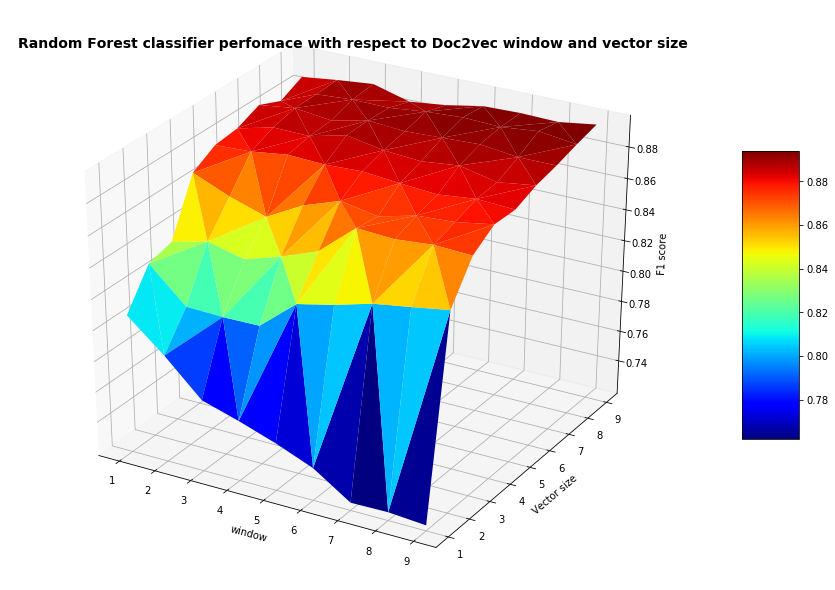

In [38]:
from matplotlib import pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig)
surf = ax.plot_trisurf(res.window_size, res.vector_size,res.fscore, cmap=cm.jet, linewidth=0.1)
ax.set_xlabel('window')
ax.set_ylabel('Vector size')
ax.set_zlabel('F1 score')
ax.set_title("Random Forest classifier perfomace with respect to Doc2vec window and vector size",pad=5,fontdict={
    "fontweight" : "bold",
    "fontsize":14
})
fig.colorbar(surf, shrink=0.5, aspect=5)
# plt.savefig("task4.png",pad_inches=0.3)
plt.show()

## Conclusion 

- The value of of `window` and `vector_size` in the Doc2vec model has an effect on the perfomace of Random Forest classifier (f1 score). 
- Increasing only `vector_size` does not guarantee increase in perfomace , so is increasing only `window`. 
- **Solution to improving classifier perfomance** : search for optimal values of `window` & `vector_size` which maximizes chosen classifier fscore . example shown from the above 3D plot.
<!-- - The perfomace of Random Forest classifier in terms of f-score value of `window`  -->